### Jupyterlab magic
Spodnja celica uvozi vse knjižnice in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

In [3]:
from math import pi
from numpy import *
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
from scipy.constants import *
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

## Pripravi vektora časa, konstante, ...

In [127]:
m=0.5
fn=5
Nx=1000
t=linspace(-10,10,Nx+1)

## Vhodni signal

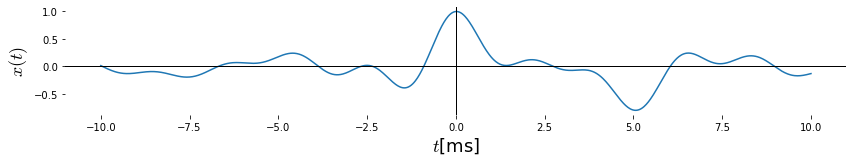

In [128]:
x=3*sinc(t)-2*sinc((t-5))+1*sinc(sin(0.5*(t+5)))
x=x-average(x)
x=x/max(abs(x))

#risanje
fig1, ax1 = plt.subplots(figsize=(14,2))
ax1.plot(t,x)
ax1.axhline(0, color='black', lw=1)
ax1.axvline(0, color='black', lw=1)
ax1.set_ylabel(r'$x(t)$',fontsize=18)
ax1.set_xlabel(r'$t$[ms]',fontsize=18)
ax1.set_frame_on(False)

## Modulacja

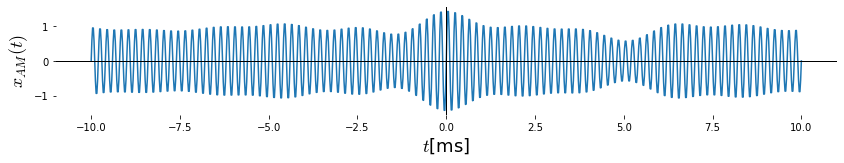

In [129]:
xAM= (x*m + 1)*sin(2*pi*fn*t)

#risanje
fig1, ax1 = plt.subplots(figsize=(14,2))
ax1.plot(t,xAM)
ax1.axhline(0, color='black', lw=1)
ax1.axvline(0, color='black', lw=1)
ax1.set_ylabel(r'$x_{AM}(t)$',fontsize=18)
ax1.set_xlabel(r'$t$[ms]',fontsize=18)
ax1.set_frame_on(False)

## Zakasnitev zaradi razdalje

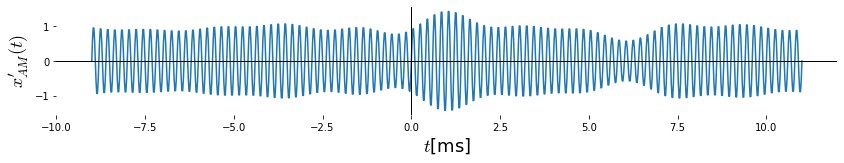

In [130]:
l=300e3 # m
c=3e8   # m/s
dt=l/c*1000   # ms
t=t+dt

#risanje
fig1, ax1 = plt.subplots(figsize=(14,2))
ax1.plot(t,xAM)
ax1.axhline(0, color='black', lw=1)
ax1.axvline(0, color='black', lw=1)
ax1.set_ylabel(r"$x_{AM}'(t)$",fontsize=18)
ax1.set_xlabel(r'$t$[ms]',fontsize=18)
ax1.set_frame_on(False)

## Demodulacija z vzorčenjem
Če vzorčimo signal z isto frekvenco kot je frekvenca nosilca, se bo spekter na obeh straneh nosilca preslikal na obe strani izhodišča - nazaj v osnovni pas. 

Vendar, če vzorčimo točno s frekvenco nosilca, bomo dobili samo vzorce z vrednostjo 0, če ne začnemo na pravem mestu. Zato moramo začetek vzorčenja premakniti za šetrtino periode nosilca (ali pa kot nosilec uporabiti cos namesto sin). V resnici bi delal z višjimi frekvencami in frekvenco vzorčenja bi izbral tako, da se ne bi točno ujemala z nosilcem. Ta primer ni nastavljen realno ampak tako, da so grafi bolj nazorni

Ker na računalniku ne mormo imeti zveznega signala, ne moremo zares izvajati vzorčenja. Vse kar lahko naredimo je, da iz bolj fino vzorčenega signala naredimo bolj grobo vzorčen signal tako, da iz fino vzorčenega signala vsamemo vsak D-ti vzorec. Temu postopku pravimo decimacija signala za faktor D (D=10 pomeni, da vsamemo samo vsak 10. vzorec originalnega signala).

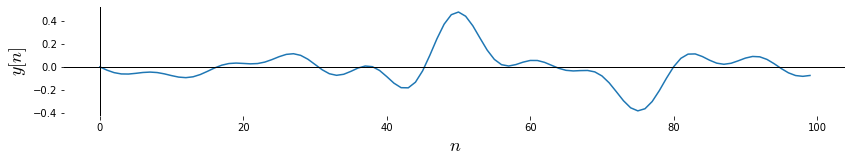

In [134]:
fs=fn
Ts=1/fn
N=int((max(t)-min(t))/Ts)
n=arange(0,N,1)
D=int(Nx/N)         #faktor decimacije D
y=xAM[n*D+2]        #vzorčenje/decimacija signala zamaknjeno za 2 vzorca, kar je malo manj kot četrtina periode
y=y-average(y)

#risanje
fig1, ax1 = plt.subplots(figsize=(14,2))
ax1.plot(n,y)
ax1.axhline(0, color='black', lw=1)
ax1.axvline(0, color='black', lw=1)
ax1.set_ylabel(r'$y[n]$',fontsize=18)
ax1.set_xlabel(r'$n$',fontsize=18)
ax1.set_frame_on(False)